## Principal component analysis em R

In [1]:
# PCA

# Importing the dataset
dataset = read.csv('Wine.csv')


In [2]:
head(dataset,10)

Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1
14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,1
14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,1
14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,1
13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,1


In [3]:
# Splitting the dataset into the Training set and Test set
# install.packages('caTools')
library(caTools)
set.seed(123)
split = sample.split(dataset$Customer_Segment, SplitRatio = 0.8)
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split == FALSE)


In [9]:
split

[1]  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE
 [13]  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE FALSE
 [25]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE
 [37]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [49]  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE
 [61]  TRUE  TRUE  TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE
 [73]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [85]  TRUE  TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [97]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE FALSE FALSE  TRUE
[109]  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
[121]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE
[133]  TRUE FALSE  TRUE  TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE
[145] FALSE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE
[157]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE
[169]  TRUE  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE

In [4]:
head(training_set,10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
2,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
3,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
6,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1
7,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,1
9,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,1
10,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,1
12,14.12,1.48,2.32,16.8,95,2.20,2.43,0.26,1.57,5.00,1.17,2.82,1280,1
13,13.75,1.73,2.41,16.0,89,2.60,2.76,0.29,1.81,5.60,1.15,2.90,1320,1
14,14.75,1.73,2.39,11.4,91,3.10,3.69,0.43,2.81,5.40,1.25,2.73,1150,1


In [5]:
head(test_set,10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
4,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
5,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
8,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,1
11,14.10,2.16,2.30,18.0,105,2.95,3.32,0.22,2.38,5.75,1.25,3.17,1510,1
16,13.63,1.81,2.70,17.2,112,2.85,2.91,0.30,1.46,7.30,1.28,2.88,1310,1
20,13.64,3.10,2.56,15.2,116,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845,1
21,14.06,1.63,2.28,16.0,126,3.00,3.17,0.24,2.10,5.65,1.09,3.71,780,1
24,12.85,1.60,2.52,17.8,95,2.48,2.37,0.26,1.46,3.93,1.09,3.63,1015,1
31,13.73,1.50,2.70,22.5,101,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285,1
32,13.58,1.66,2.36,19.1,106,2.86,3.19,0.22,1.95,6.90,1.09,2.88,1515,1


In [6]:
# Feature Scaling
training_set[-14] = scale(training_set[-14])
test_set[-14] = scale(test_set[-14])


In [7]:
head(training_set,10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
1,1.5207582,-0.55639963,0.23579171,-1.0905953,1.88706849,0.8113772,1.0287334,-0.6783993,1.20207483,0.26175076,0.3765715,1.8639715,1.066096,1
2,0.2326757,-0.49235827,-0.80604333,-2.3498893,0.03193501,0.5690562,0.7307323,-0.8411235,-0.57838135,-0.27972739,0.4197159,1.1205576,1.016522,1
3,0.1826530,0.03827019,1.09800002,-0.2319858,0.10064365,0.8113772,1.2075341,-0.5156752,2.11874534,0.27894054,0.3334272,0.7917399,1.462687,1
6,1.4832413,-0.51065580,0.30764240,-1.2050766,0.85643878,1.5706496,1.3565347,-0.1902268,0.63796990,0.73876722,0.4197159,0.3342544,2.338493,1
7,1.7208487,-0.41001937,0.30764240,-1.3767985,-0.24289959,0.3267352,0.4923314,-0.5156752,0.65559818,0.09415038,0.2902828,1.3778932,1.809705,1
9,2.2710976,-0.62044100,-0.69826729,-1.5485204,-0.17419094,0.8113772,0.9492665,-0.5970372,0.65559818,0.07266315,0.5491491,0.3342544,0.999997,1
10,1.0580490,-0.88575523,-0.33901383,-0.9761141,-0.10548229,1.1021624,1.1181338,-1.1665718,0.42643055,0.94074717,0.2471384,1.3350039,0.999997,1
12,1.3831960,-0.76682126,-0.15938710,-0.7471515,-0.31160823,-0.1579068,0.4029311,-0.8411235,-0.06716126,-0.01328576,0.9374486,0.2913651,1.776655,1
13,0.9204867,-0.53810210,0.16394102,-0.9761141,-0.72386012,0.4882825,0.7307323,-0.5970372,0.35591744,0.24456098,0.8511599,0.4057365,1.908853,1
14,2.1710523,-0.53810210,0.09209032,-2.2926486,-0.58644282,1.2960192,1.6545358,0.5420319,2.11874534,0.15861206,1.2826038,0.1626973,1.347015,1


In [8]:
head(test_set,10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
4,1.6381499,-0.3750461,0.47797940,-1.1382021,0.93433494,2.3677461,1.4693320,-0.8775001,1.1035523,1.13900491,-0.53366102,1.1262822,1.96727025,1
5,0.3363344,0.1489722,1.89279840,0.4406617,1.30973738,0.7794444,0.6538230,0.2588310,0.4988150,-0.36541823,0.29364123,0.4421809,-0.08118990,1
8,1.2810147,-0.2112904,0.89860126,-0.8374661,1.53497884,0.4769107,0.4703335,-0.3472123,-0.4586858,-0.04983522,0.38556370,1.2973075,1.45859223,1
11,1.3270967,-0.2031026,-0.28678764,-0.6870981,0.33369105,1.0063446,1.2960363,-1.0290109,1.4395175,0.25277863,1.25882718,0.7579199,2.04975858,1
16,0.7856335,-0.4896751,1.24274643,-0.9878341,0.85925446,0.8550778,0.8780880,-0.4229677,-0.1059224,0.92285216,1.39671089,0.3764019,1.49983639,1
20,0.7971540,0.5665493,0.70740950,-1.7396740,1.15957640,0.6281775,1.0004143,-1.4077879,0.2300428,-0.02821994,-0.07404866,1.0078800,0.22126730,1
21,1.2810147,-0.6370552,-0.36326434,-1.4389380,1.91038127,1.0819780,1.1431284,-0.8775001,0.9691662,0.20954808,0.52344741,1.4683328,0.04254259,1
24,-0.1129648,-0.6616186,0.55445610,-0.7622821,-0.41711381,0.2953905,0.3276194,-0.7259893,-0.1059224,-0.53401738,0.52344741,1.3630865,0.68870116,1
31,0.9008385,-0.7434964,1.24274643,1.0045416,0.03336911,1.0819780,1.2246793,-0.4987231,1.4395175,0.23116336,0.98305977,0.1527534,1.43109612,1
32,0.7280311,-0.6124919,-0.05735753,-0.2735862,0.40877154,0.8702045,1.1635161,-1.0290109,0.7171923,0.74992996,0.52344741,0.3764019,2.06350664,1


In [12]:
# Applying PCA
install.packages('caret')

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘abind’, ‘bindr’, ‘mnormt’, ‘lava’, ‘kernlab’, ‘CVST’, ‘DEoptimR’, ‘magic’, ‘bindrcpp’, ‘pkgconfig’, ‘plogr’, ‘psych’, ‘prodlim’, ‘DRR’, ‘robustbase’, ‘sfsmisc’, ‘geometry’, ‘iterators’, ‘dplyr’, ‘broom’, ‘ipred’, ‘dimRed’, ‘lubridate’, ‘timeDate’, ‘ddalpha’, ‘purrr’, ‘gower’, ‘RcppRoll’, ‘tidyselect’, ‘tidyr’, ‘pls’, ‘foreach’, ‘ModelMetrics’, ‘recipes’




The downloaded binary packages are in
	/var/folders/qq/gkyyxk3d0q769zkwc0hf1mfw0000gn/T//RtmpLFMOo8/downloaded_packages


In [13]:
library(caret)


Warning message:
“package ‘caret’ was built under R version 3.4.4”Loading required package: lattice
Loading required package: ggplot2


In [14]:
install.packages('e1071')



The downloaded binary packages are in
	/var/folders/qq/gkyyxk3d0q769zkwc0hf1mfw0000gn/T//RtmpLFMOo8/downloaded_packages


In [15]:
library(e1071)


In [16]:
#criar uma variável training_set com 2 features
pca = preProcess(x = training_set[-14], method = 'pca', pcaComp = 2)


In [17]:
pca

Created from 142 samples and 13 variables

Pre-processing:
  - centered (13)
  - ignored (0)
  - principal component signal extraction (13)
  - scaled (13)

PCA used 2 components as specified

In [18]:
training_set = predict(pca, training_set)
head(training_set,10)

,Customer_Segment,PC1,PC2
1,1,-3.249569,1.5661160
2,1,-2.165889,-0.3186768
3,1,-2.501192,1.2353892
6,1,-2.941040,2.2999654
7,1,-2.393131,1.3228050
9,1,-2.418465,1.0367916
10,1,-2.674203,0.9046933
12,1,-1.718188,0.6875812
13,1,-2.072478,0.8168917
14,1,-3.353690,1.4239468


In [19]:
#preciso trocar a ordem das variáveis.
training_set = training_set[c(2, 3, 1)]
head(training_set,10)

,PC1,PC2,Customer_Segment
1,-3.249569,1.5661160,1
2,-2.165889,-0.3186768,1
3,-2.501192,1.2353892,1
6,-2.941040,2.2999654,1
7,-2.393131,1.3228050,1
9,-2.418465,1.0367916,1
10,-2.674203,0.9046933,1
12,-1.718188,0.6875812,1
13,-2.072478,0.8168917,1
14,-3.353690,1.4239468,1


In [20]:
#fazer o mesmo para o conjunto de teste
test_set = predict(pca, test_set)
head(test_set,10)

,Customer_Segment,PC1,PC2
4,1,-3.481905,2.7632899
5,1,-1.036443,0.9838128
8,1,-1.986189,1.5520613
11,1,-3.329896,1.2446480
16,1,-2.236477,1.6347229
20,1,-2.112082,1.0008301
21,1,-3.079321,0.8298925
24,1,-1.651971,-0.4881216
31,1,-2.334858,1.3215101
32,1,-2.493278,1.4063517


In [21]:
test_set = test_set[c(2, 3, 1)]
head(test_set,10)


,PC1,PC2,Customer_Segment
4,-3.481905,2.7632899,1
5,-1.036443,0.9838128,1
8,-1.986189,1.5520613,1
11,-3.329896,1.2446480,1
16,-2.236477,1.6347229,1
20,-2.112082,1.0008301,1
21,-3.079321,0.8298925,1
24,-1.651971,-0.4881216,1
31,-2.334858,1.3215101,1
32,-2.493278,1.4063517,1


In [10]:

# Fitting SVM to the Training set
install.packages('e1071')



The downloaded binary packages are in
	/var/folders/qq/gkyyxk3d0q769zkwc0hf1mfw0000gn/T//RtmpLFMOo8/downloaded_packages


In [11]:
library(e1071)


In [22]:
classifier = svm(formula = Customer_Segment ~ .,
                 data = training_set,
                 type = 'C-classification',
                 kernel = 'linear')


In [23]:
classifier


Call:
svm(formula = Customer_Segment ~ ., data = training_set, type = "C-classification", 
    kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.5 

Number of Support Vectors:  33


In [26]:
# Predicting the Test set results
y_pred = predict(classifier, newdata = test_set[-3])
head(y_pred,10)

4  5  8 11 16 20 21 24 31 32 
 1  1  1  1  1  1  1  1  1  1 
Levels: 1 2 3

In [27]:
# Making the Confusion Matrix
cm = table(test_set[, 3], y_pred)
cm

   y_pred
     1  2  3
  1 12  0  0
  2  0 14  0
  3  0  0 10

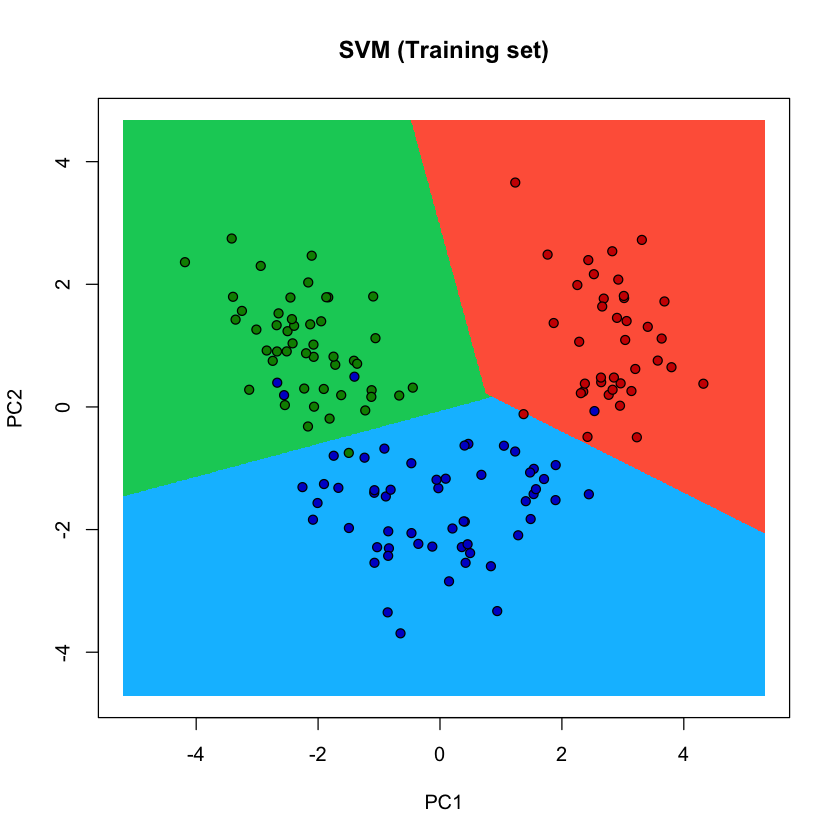

In [28]:
# Visualising the Training set results
library(ElemStatLearn)
set = training_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('PC1', 'PC2')
y_grid = predict(classifier, newdata = grid_set)
plot(set[, -3],
     main = 'SVM (Training set)',
     xlab = 'PC1', ylab = 'PC2',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 2, 'deepskyblue', ifelse(y_grid == 1, 'springgreen3', 'tomato')))
points(set, pch = 21, bg = ifelse(set[, 3] == 2, 'blue3', ifelse(set[, 3] == 1, 'green4', 'red3')))



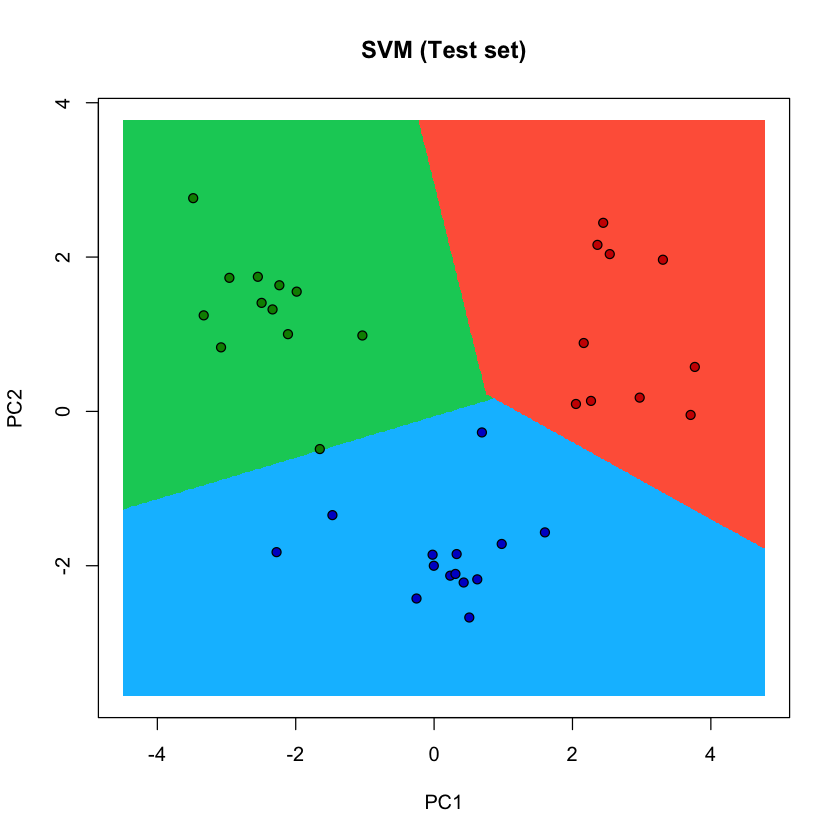

In [29]:
# Visualising the Test set results
library(ElemStatLearn)
set = test_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('PC1', 'PC2')
y_grid = predict(classifier, newdata = grid_set)
plot(set[, -3], main = 'SVM (Test set)',
     xlab = 'PC1', ylab = 'PC2',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 2, 'deepskyblue', ifelse(y_grid == 1, 'springgreen3', 'tomato')))
points(set, pch = 21, bg = ifelse(set[, 3] == 2, 'blue3', ifelse(set[, 3] == 1, 'green4', 'red3')))